In [1]:
import numpy as np, matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
"""
This algorithm is adapted from stackoverflow for
generating a list of lists, each containing a row of Khayyam-Pascal numbers.
"""


def gen(n,r=[]):
    for x in range(n):
        l = len(r)
        r = [1 if i == 0 or i == l else r[i-1]+r[i] for i in range(l+1)]
        yield r


def KP_data_generator(n):
    ps = list(gen(n))
    max = len(' '.join(map(str,ps[-1])))
    # Generally, nested NumPy arrays of NumPy arrays are not very useful.
    # If NumPy is being used for its speed, usually it is best to stick with NumPy 
    # arrays with a homogeneous, basic numeric dtype, instead of lists with different dimensions each.
    return ps

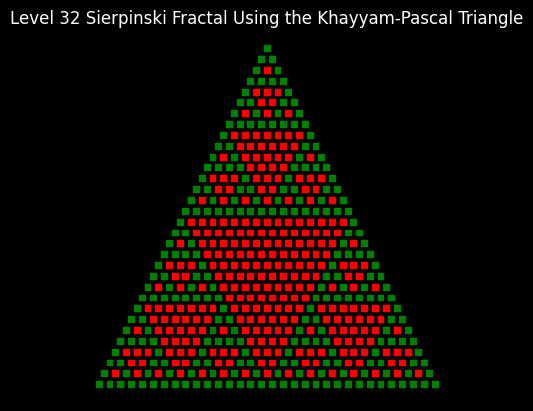

In [3]:
"""
A for-loop approach using the KP_data_generator() function defined in the previous cell;
this cell will produce the data using the said function, and then plot the data for an
arbitrary nth-level Khayyam-Pascal triangle.
"""


# The desired number of rows for the triangle (the level of the triangle):
num_rows = 32
# Generating the data for the given number of rows
data = KP_data_generator(num_rows)
# Initiating a plot:
fig, ax = plt.subplots()
# Using a for-loop to plot the data row at a time, starting from the last row up:
for i in range(num_rows-1, -1, -1):
    # Using simple mathematical tricks to create the correct form of x's and y's suitable for plotting:
    xs = np.arange(i+1) + ((num_rows-i-1) * 0.5)
    ys =  (i+1) * [num_rows-i-1]
    # Boolean indexing and setting the color for even and odd numbers in each row of data:
    custom_colormap = np.where((np.array(data[i]))%2==0, "r", "g")
    # Plotting the row data[i]:
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.set_title(f"Level {num_rows} Sierpinski Fractal Using the Khayyam-Pascal Triangle")
    # s=600//num_rows so that the size of the markers will diminish with the level.
    # The number 600 seems a reasonable constant for default figsize and num_rows above 100
    ax.scatter(xs, ys, marker="s", s=600//num_rows, c=custom_colormap)
    ax.set_axis_off();

In [4]:
"""
Defining an ultimate function to draw the Sierpinski fractal using the Khayyam-Pascal triangle
based on the previous cell
"""

def draw_sierpinski(num_rows:int, colors=("r", "g")):
    """
    num_rows : int
    colors : iterable of length 2
    
    Takes an integer num_rows and draws the Sierpinski fractal using the Khayyam-Pascal triangle.
    Notice that in order to have a full triangle, num_rows must be a power of 2.
    """
    num_rows = num_rows
    data = KP_data_generator(num_rows)
    fig, ax = plt.subplots()
    for i in range(num_rows-1, -1, -1):
        xs = np.arange(i+1) + ((num_rows-i-1) * 0.5)
        ys =  (i+1) * [num_rows-i-1]
        custom_colormap = np.where((np.array(data[i]))%2==0, colors[0], colors[1])
        ax.set_aspect("equal")
        ax.set_axis_off()
        ax.set_title(f"Level {num_rows} Sierpinski Fractal Using the Khayyam-Pascal Triangle")
        ax.scatter(xs, ys, marker="s", s=600//num_rows, c=custom_colormap)
        ax.set_axis_off();
    # The figure object will also be returned so that it can be saved.
    return fig

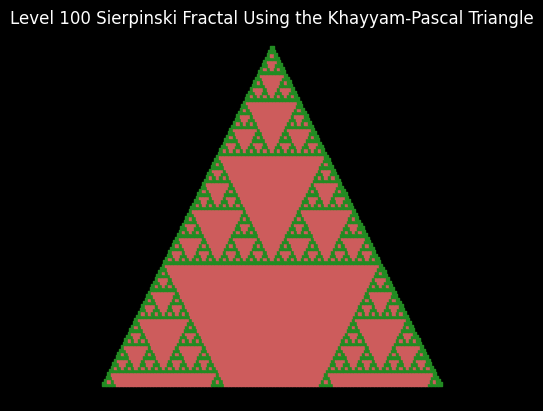

In [5]:
draw_sierpinski(100, colors=["indianred", "forestgreen"]);

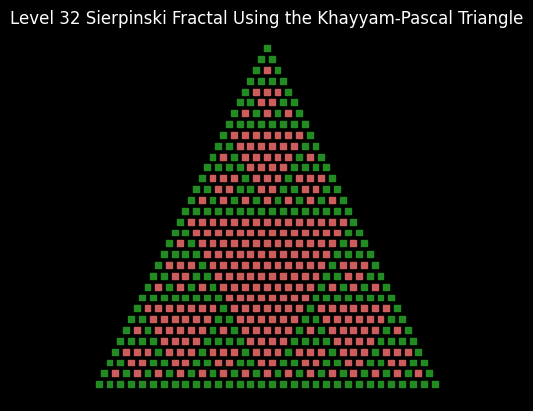

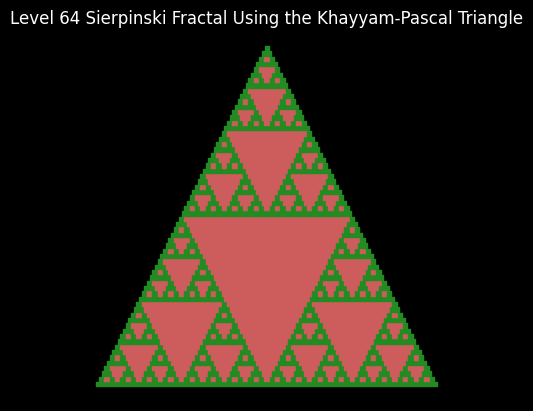

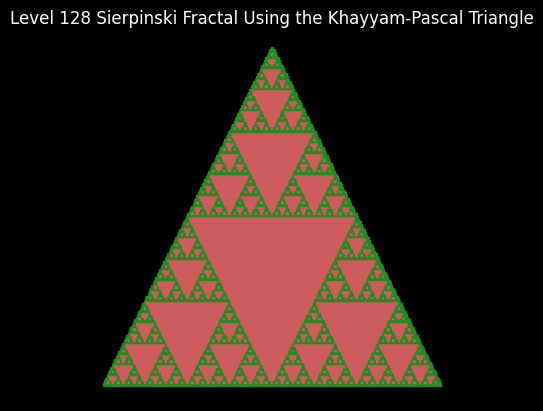

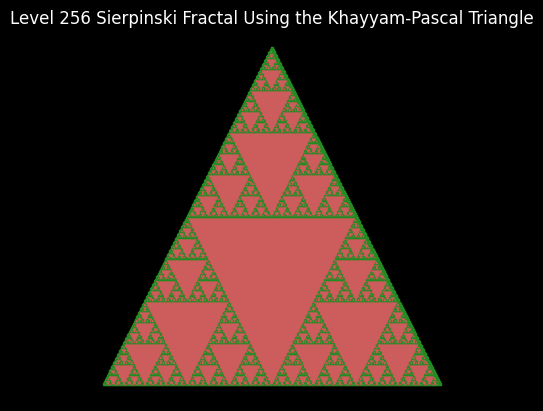

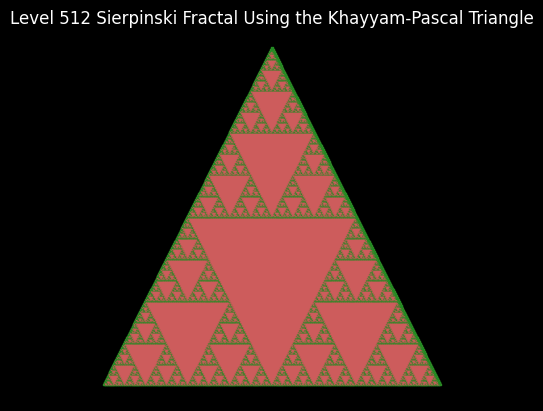

In [6]:
for level in [32, 64, 128, 256, 512]:
    figure = draw_sierpinski(level, colors=["indianred", "forestgreen"])
    figure.savefig(f"Level_{level}KhayyamPascal.jpg")